1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


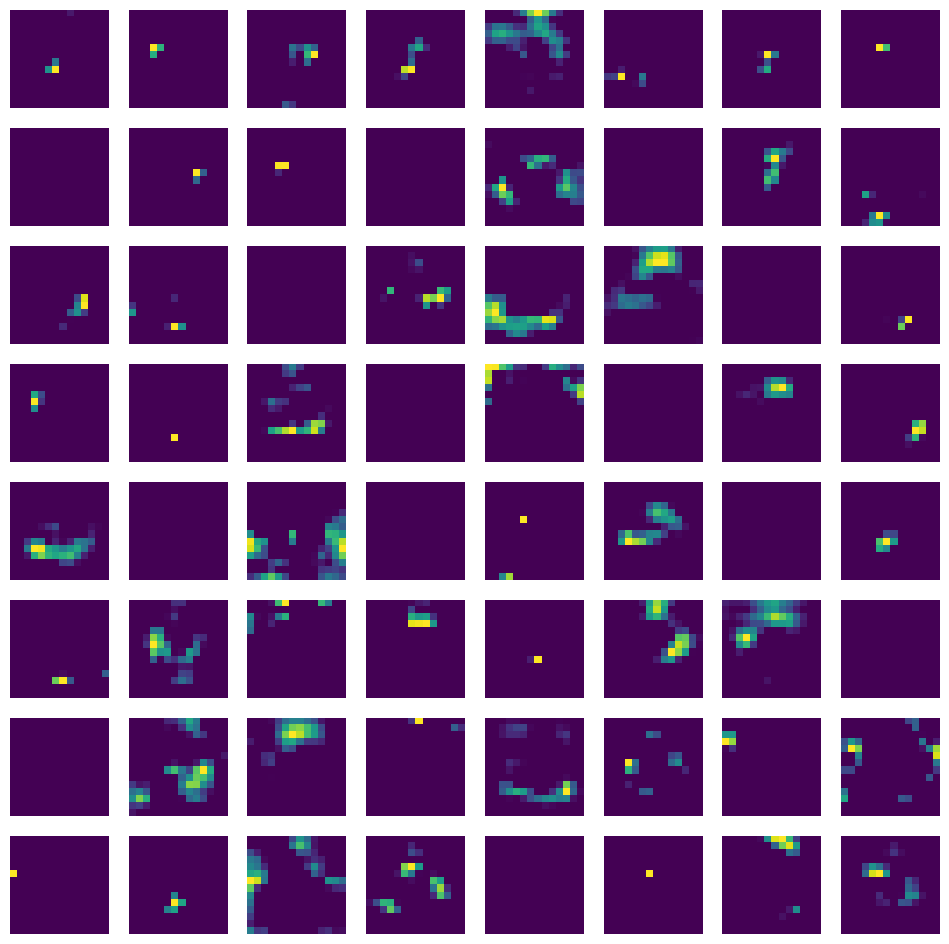

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Load and preprocess image
img_path = 'kappal.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get feature maps
feature_maps = model.predict(img_array)

# Visualize feature maps
def plot_feature_maps(feature_maps, size=(8, 8)):
    num_feature_maps = feature_maps.shape[-1]
    fig, axes = plt.subplots(size[0], size[1], figsize=(12, 12))
    for i in range(size[0]):
        for j in range(size[1]):
            ax = axes[i, j]
            feature_map = feature_maps[0, :, :, i * size[1] + j]
            ax.imshow(feature_map, cmap='viridis')
            ax.axis('off')
    plt.show()

plot_feature_maps(feature_maps)
